# Dataset Statistics

In [2]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

df = pd.read_csv("data/fullDataset.csv", lineterminator="\n")
df.head()

,text,sentiment,topic
0,I posted this 100 years ago!,Very Positive,Social Media
1,Nope,Very Negative,Politics
2,lmfao I can't believe this works,Very Negative,Gadgets & Devices
3,I had to beat an old lady with a stick to get ...,Very Negative,General Activities
4,I had to beat an old lady with a stick to get ...,Very Negative,General Activities


In [3]:
df.text.str.len().max()

np.int64(354)

In [4]:
SENTIMENT_LABELS = list(df["sentiment"].unique())
SENTIMENT_LABELS

['Very Positive', 'Very Negative', 'Neutral', 'Positive', 'Negative']

In [5]:
from utils.pre_processing import get_sentiment_frequency, get_sentiment_distribution

SENTIMENT_LABELS = [x.lower() for x in SENTIMENT_LABELS]

pos_sentiment = get_sentiment_frequency(df, "Positive", sentiment_labels=SENTIMENT_LABELS)
neg_sentiment = get_sentiment_frequency(df, "Negative", sentiment_labels=SENTIMENT_LABELS)
very_pos_sentiment = get_sentiment_frequency(df, "Very Positive", sentiment_labels=SENTIMENT_LABELS)
very_neg_sentiment = get_sentiment_frequency(df, "Very Negative", sentiment_labels=SENTIMENT_LABELS)
neu_sentiment = get_sentiment_frequency(df, "Neutral", sentiment_labels=SENTIMENT_LABELS)

total_posts = len(df)

print(f"{total_posts} total posts")
print(f"Positive sentiment: {pos_sentiment} - {pos_sentiment * 100 / total_posts:.2f}%")
print(f"Very positive sentiment: {very_pos_sentiment} - {very_pos_sentiment * 100 / total_posts:.2f}%")
print(f"Negative sentiment: {very_neg_sentiment} - {neg_sentiment * 100 / total_posts:.2f}%")
print(f"Very negative sentiment: {very_pos_sentiment} - {very_neg_sentiment * 100 / total_posts:.2f}%")
print(f"Neural sentiment: {neu_sentiment} - {neu_sentiment * 100 / total_posts:.2f}%")

1220825 total posts
Positive sentiment: 120599 - 9.88%
Very positive sentiment: 349487 - 28.63%
Negative sentiment: 215956 - 7.34%
Very negative sentiment: 349487 - 17.69%
Neural sentiment: 445166 - 36.46%


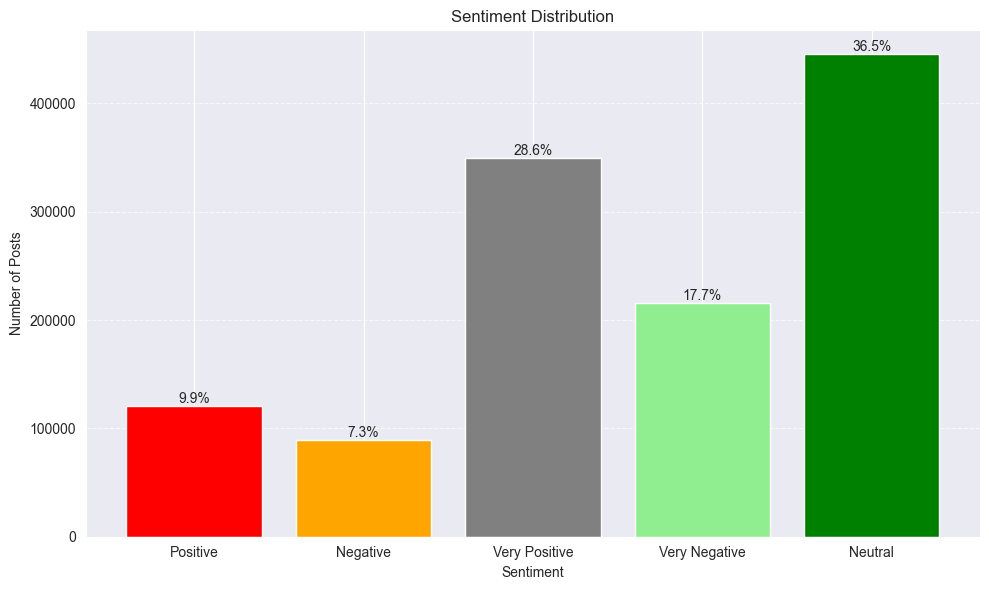

In [6]:
sentiment_counts = {
    "Positive": pos_sentiment,
    "Negative": neg_sentiment,
    "Very Positive": very_pos_sentiment,
    "Very Negative": very_neg_sentiment,
    "Neutral": neu_sentiment
}
get_sentiment_distribution(df, sentiment_counts)

Positive sentiment: 470086 - 38.51%
Negative sentiment: 305573 - 25.03%
Neutral sentiment: 445166 - 36.46%


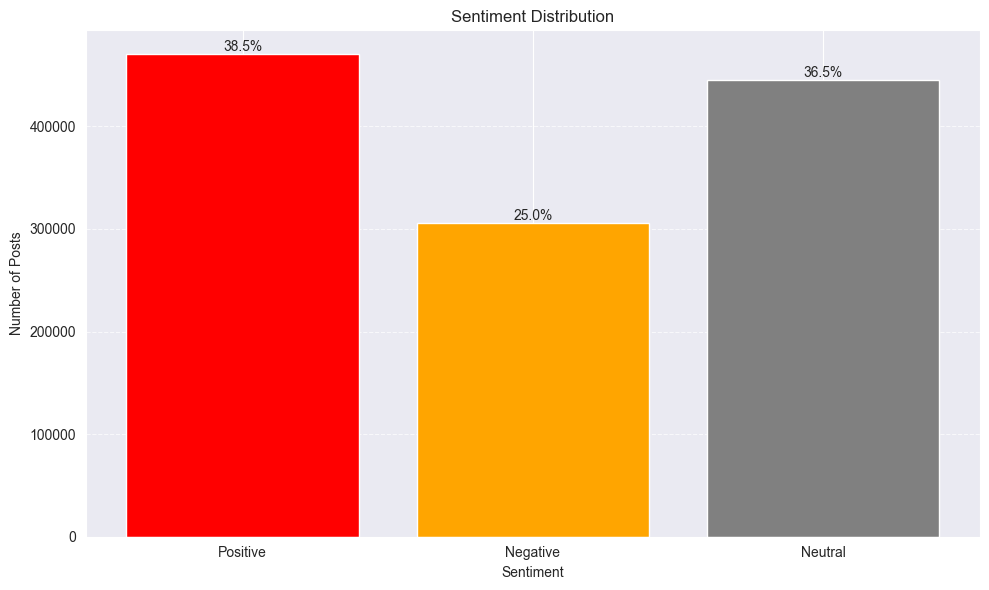

In [7]:
# aggregate sentiments to deal with class imbalance
df["sentiment"] = df["sentiment"].replace({
    "Very Positive": "Positive",
    "Very Negative": "Negative"
})

pos_sentiment = get_sentiment_frequency(df, "Positive")
neg_sentiment = get_sentiment_frequency(df, "Negative")

sentiment_counts = {
    "Positive": pos_sentiment,
    "Negative": neg_sentiment,
    "Neutral": neu_sentiment
}

print(f"Positive sentiment: {pos_sentiment} - {pos_sentiment * 100 / total_posts:.2f}%")
print(f"Negative sentiment: {neg_sentiment} - {neg_sentiment * 100 / total_posts:.2f}%")
print(f"Neutral sentiment: {neu_sentiment} - {neu_sentiment * 100 / total_posts:.2f}%")

get_sentiment_distribution(df, sentiment_counts)

In [8]:
# split datasets
from sklearn.model_selection import train_test_split
from utils.constants import SEED

# First split: train (70%) and temp (30%)
X_temp = df.drop(columns="sentiment")
y_temp = df["sentiment"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X_temp,
    y_temp,
    train_size=0.7,
    random_state=SEED,
    stratify=y_temp
)

# Second split: validation (15%) and test (15%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% of the remaining 30% = 15% of total
    random_state=SEED,
    stratify=y_temp
)

print("Original set distribution:")
print(df["sentiment"].value_counts(normalize=True))
print("=========================")
# Check label distributions
print("Train set distribution:")
print(y_train.value_counts(normalize=True))
print("=========================")
print("\nValidation set distribution:")
print(y_val.value_counts(normalize=True))
print("=========================")
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

Original set distribution:
sentiment
Positive    0.385056
Neutral     0.364644
Negative    0.250300
Name: proportion, dtype: float64
Train set distribution:
sentiment
Positive    0.385056
Neutral     0.364644
Negative    0.250300
Name: proportion, dtype: float64

Validation set distribution:
sentiment
Positive    0.385056
Neutral     0.364644
Negative    0.250300
Name: proportion, dtype: float64

Test set distribution:
sentiment
Positive    0.385056
Neutral     0.364644
Negative    0.250300
Name: proportion, dtype: float64


In [9]:
train_df = X_train.copy()
train_df["sentiment"] = y_train

val_df = X_val.copy()
val_df["sentiment"] = y_val

test_df = X_test.copy()
test_df["sentiment"] = y_test

# Save to CSV
train_df.to_csv("./data/train.csv", index=False)
val_df.to_csv("./data/validation.csv", index=False)
test_df.to_csv("./data/test.csv", index=False)